<a id="ml-dl-mathematik-kompakter-spickzettel"></a>
# ML/DL Mathematik – kompakter Spickzettel

LaTeX-Formeln für zentrale Konzepte mit kurzen Demos.


## Inhaltsverzeichnis

- [Lineare Regression & MSE](#lineare-regression-mse)
- [Logistische Regression & Cross-Entropy](#logistische-regression)
- [Optimierung](#optimierung)
- [Regularisierung](#regularisierung)
- [Entscheidungsbäume & Ensembles](#entscheidungsbaeume)
- [Bias-Variance](#bias-variance)
- [Deep Learning Basics](#deep-learning)
- [CNN Shapes](#cnn-shapes)
- [Attention](#attention)
- [Metriken](#metriken)


---
<a id="lineare-regression-mse"></a>
## Lineare Regression & MSE


Loss: $$\mathcal{L}(w) = \frac{1}{N}\sum_{i=1}^N (y_i - \hat y_i)^2, \quad \hat y = Xw$$

Gradient: $$\nabla_w \mathcal{L} = -\frac{2}{N} X^\top (y - Xw)$$

Closed Form: $$w = (X^\top X)^{-1} X^\top y$$

Regularisierung (Ridge): $$\mathcal{L}_{ridge} = \text{MSE} + \lambda \|w\|_2^2$$



### Erklärungen zu den Formeln:

- **Loss (MSE):** Quadratischer Durchschnittsfehler zwischen Vorhersage $$\hat y = Xw$$ und Ziel $$y$$. Große Ausreißer werden stark bestraft.
- **Gradient:** $$-\tfrac{2}{N}X^T(y-\hat y)$$ ist die Richtung für das Update. In Zelle 3 wird genau das berechnet (`grad = -(2/len(Xb)) * Xb.T @ (y - y_hat)`).
- **Closed Form:** Löst $$X^T X w = X^T y$$ exakt (nur möglich, wenn $$X^T X$$ invertierbar ist).
- **Ridge-Regularisierung:** $$\lambda\|w\|_2^2$$ schrumpft Gewichte und verbessert Generalisierung; erweitert die MSE um eine Strafe für große $$w$$.


In [1]:
import numpy as np
np.random.seed(0)
X = np.random.randn(200, 1)
y = 3 * X[:,0] + 0.5 + 0.3 * np.random.randn(200)
Xb = np.c_[np.ones_like(X), X]

w = np.zeros(2)
alpha = 0.1
for _ in range(200):
    y_hat = Xb @ w
    grad = -(2/len(Xb)) * Xb.T @ (y - y_hat)
    w -= alpha * grad
w


array([0.46011025, 3.0209476 ])

### Demo: Gradient Descent für Lineare Regression

So hängen Code (Zellen 3/4) und Formeln zusammen:
1. Erzeuge synthetische Daten mit Rauschen, füge eine Eins-Spalte `Xb` hinzu, damit der Bias gelernt wird.
2. Starte mit $$w=[0,0]$$, berechne Vorhersage $$\hat y = Xb\,w$$, den Gradient aus der MSE und aktualisiere $$w$$ per Gradient Descent.
3. Nach 200 Iterationen wird das gelernte $$w$$ ausgegeben; die Plot-Zelle darunter zeigt Datenpunkte und den Fit der gelernten Geraden.


---
<a id="logistische-regression"></a>
## Logistische Regression & Cross-Entropy


Sigmoid: $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Vorhersage: $$\hat y = \sigma(Xw)$$

Loss: $$\mathcal{L} = -\frac{1}{N}\sum_i \big[y_i \log \hat y_i + (1-y_i) \log(1-\hat y_i)\big]$$

Gradient: $$\nabla_w \mathcal{L} = \frac{1}{N} X^\top (\hat y - y)$$



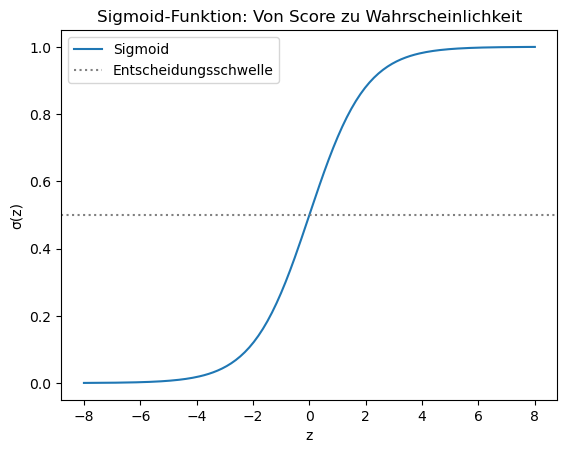

In [2]:
# Demo: Logistische Regression – Sigmoid und Entscheidung
import matplotlib.pyplot as plt
z = np.linspace(-8, 8, 200)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid, label="Sigmoid")
plt.axhline(0.5, color="gray", linestyle=":", label="Entscheidungsschwelle")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid-Funktion: Von Score zu Wahrscheinlichkeit")
plt.legend()
plt.show()

### Erklärungen zu den Formeln:

- **Sigmoid:** Staucht jeden Score in (0,1); 0 wird zu 0.5 (typische Schwelle für Klasse 1).
- **Vorhersage:** $$\hat y = \sigma(Xw)$$ ist die geschätzte Wahrscheinlichkeit für Klasse 1 je Datenpunkt.
- **Loss (Cross-Entropy):** Bestraft falsche, aber sehr selbstsichere Vorhersagen stark; kleiner ist besser.
- **Gradient:** $$X^T(\hat y - y)/N$$ gibt die Richtung, in die die Gewichte verschoben werden müssen, um den Loss zu senken.
- **Code (Zelle 7):** Zeichnet die Sigmoid-Kurve und markiert 0.5 als Schwelle; zeigt, wie aus Roh-Scores Wahrscheinlichkeiten werden.


---
<a id="optimierung"></a>
## Optimierung


- Gradient Descent: $$w_{t+1} = w_t - \eta \nabla_w \mathcal{L}$$

- Momentum: $$v_{t+1} = \beta v_t + (1-\beta) \nabla_w \mathcal{L}, \quad w_{t+1} = w_t - \eta v_{t+1}$$

- Adam (vereinfacht): $$m_t=\beta_1 m_{t-1} + (1-\beta_1)g_t, \ v_t=\beta_2 v_{t-1} + (1-\beta_2)g_t^2, \ w_{t+1} = w_t - \eta \frac{m_t}{\sqrt{v_t}+\epsilon}$$



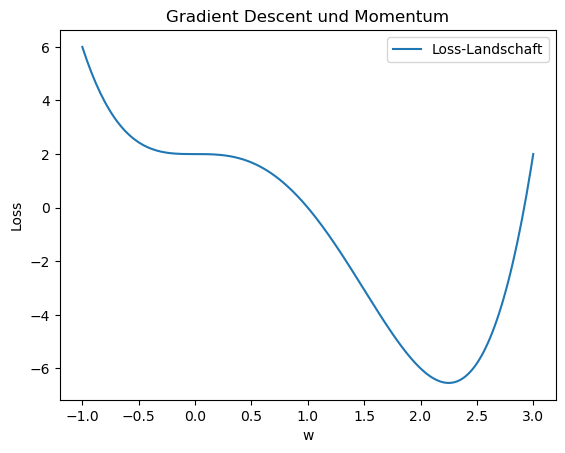

In [3]:
# Demo: Gradient Descent vs. Momentum
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
loss_landscape = lambda w: w**4 - 3*w**3 + 2
w = np.linspace(-1, 3, 200)
plt.plot(w, loss_landscape(w), label="Loss-Landschaft")
plt.xlabel("w")
plt.ylabel("Loss")
plt.title("Gradient Descent und Momentum")
plt.legend()
plt.show()

### Erklärungen zu den Formeln:

- **Gradient Descent:** Wiederholte Updates $$w_{t+1} = w_t - \eta \nabla_w \mathcal{L}$$ bewegen die Gewichte entgegen der Steigung.
- **Momentum:** Glättet Updates mit einem laufenden Mittel (\(\beta\)), verhindert Zick-Zack und beschleunigt in Tälern.
- **Adam:** Nutzt gleitende Mittel von Gradienten und deren Quadraten → adaptive Lernraten je Parameter (Bias-Korrektur hier weggelassen).
- **Code (Zelle 10):** Plottet eine Beispiel-Loss-Landschaft $$w^4-3w^3+2$$, um zu zeigen, wie Schrittweite/Momentum das Navigieren in Tälern beeinflussen.


---
<a id="regularisierung"></a>
## Regularisierung

- L2 (Ridge): $$\lambda \|w\|_2^2$$
- L1 (Lasso): $$\lambda \|w\|_1$$
- Dropout: zufälliges Nullsetzen von Neuronen im Training.
- Early Stopping: Stop bei steigendem Val-Loss.


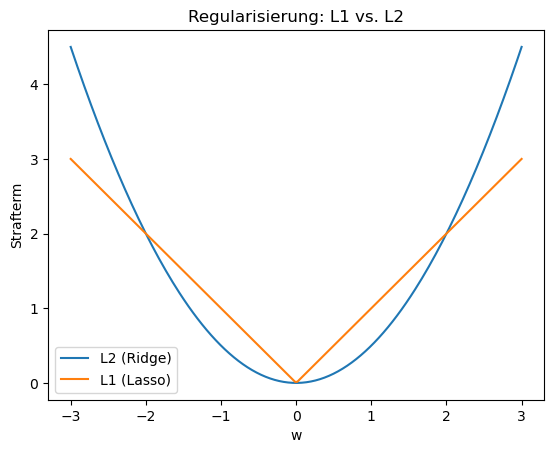

In [4]:
# Demo: Regularisierungseffekt (Ridge vs. Lasso)
import numpy as np
import matplotlib.pyplot as plt
w = np.linspace(-3, 3, 200)
l2 = 0.5 * w**2
l1 = np.abs(w)
plt.plot(w, l2, label="L2 (Ridge)")
plt.plot(w, l1, label="L1 (Lasso)")
plt.xlabel("w")
plt.ylabel("Strafterm")
plt.title("Regularisierung: L1 vs. L2")
plt.legend()
plt.show()

### Erklärungen zu den Formeln:

- **L2 (Ridge):** Quadratische Strafe; schrumpft alle Gewichte leicht, selten exakt 0.
- **L1 (Lasso):** Absolute Strafe; viele Gewichte werden exakt 0 (Feature-Selektion).
- **Dropout:** Deaktiviert zufällig Neuronen im Training, zwingt das Netz zu robusten Features.
- **Early Stopping:** Stoppt, wenn der Validierungsfehler steigt, bevor Überanpassung einsetzt.
- **Code (Zelle 13):** Plottet L1 (V-Knick, führt zu 0) und L2 (Parabel, weiches Schrumpfen) über einem Gewichtsbereich.


---
<a id="entscheidungsbaeume"></a>
## Entscheidungsbäume & Ensemble-Signale


- Entropie: $$H = -\sum_k p_k \log p_k$$

- Gini: $$G = 1 - \sum_k p_k^2$$

- Informationsgewinn: $$IG = H(\text{parent}) - \sum_j \frac{N_j}{N} H(j)$$

- Bagging/Boosting: viele schwache Modelle, gemittelt/gewichtet.


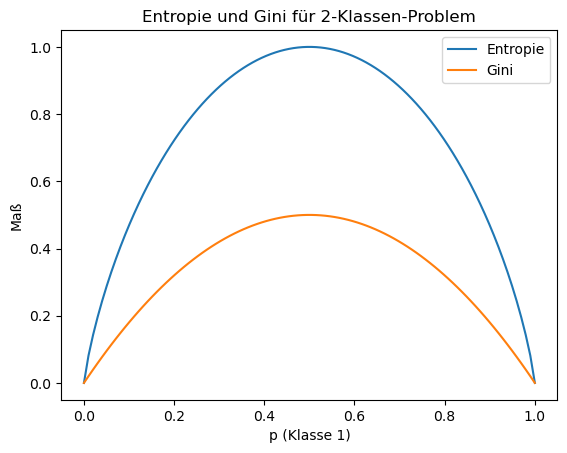

In [5]:
# Demo: Entropie und Gini für 2-Klassen
import numpy as np
import matplotlib.pyplot as plt
p = np.linspace(0, 1, 100)
H = -p * np.log2(p + 1e-9) - (1-p) * np.log2(1-p + 1e-9)
G = 1 - p**2 - (1-p)**2
plt.plot(p, H, label="Entropie")
plt.plot(p, G, label="Gini")
plt.xlabel("p (Klasse 1)")
plt.ylabel("Maß")
plt.title("Entropie und Gini für 2-Klassen-Problem")
plt.legend()
plt.show()

### Erklärungen zu den Formeln:

- **Entropie:** $$-\sum p_k \log p_k$$ misst Durchmischung; 0 bei reiner Klasse, Maximum bei Gleichverteilung.
- **Gini:** $$1-\sum p_k^2$$ misst ebenfalls Unreinheit, ist rechnerisch günstiger.
- **Informationsgewinn:** Eltern-Unreinheit minus gewichtete Kinder-Unreinheit; hoher Wert bedeutet guter Split.
- **Bagging/Boosting:** Viele schwache Modelle werden gemittelt (Bagging) oder sequentiell verstärkt (Boosting).
- **Code (Zelle 16):** Plottet Entropie und Gini für Zweiklassenfälle; Minimum bei p=0 oder 1, Maximum bei p=0.5.


---
<a id="bias-variance"></a>
## Bias-Variance

Bias = systematischer Fehler (Unteranpassung), Varianz = Sensitivität auf Rauschen (Überanpassung). Regularisierung/mehr Daten/Ensembles balancieren Bias/Varianz.


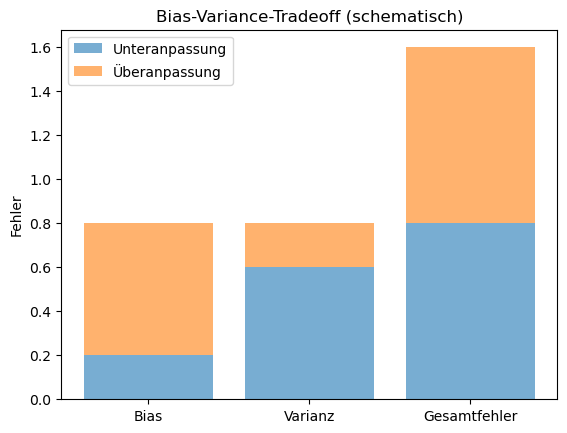

In [6]:
# Demo: Bias-Variance-Tradeoff (schematisch)
import matplotlib.pyplot as plt
x = ["Bias", "Varianz", "Gesamtfehler"]
y1 = [0.2, 0.6, 0.8]  # zu einfach
y2 = [0.6, 0.2, 0.8]  # zu komplex
plt.bar(x, y1, alpha=0.6, label="Unteranpassung")
plt.bar(x, y2, alpha=0.6, label="Überanpassung", bottom=y1)
plt.ylabel("Fehler")
plt.title("Bias-Variance-Tradeoff (schematisch)")
plt.legend()
plt.show()

### Erklärungen zu den Formeln:

- **Bias:** Systematischer Fehler, weil das Modell zu simpel ist; führt zu stabilen, aber hohen Fehlern (Unteranpassung).
- **Varianz:** Hohe Sensitivität auf Rauschen, weil das Modell zu komplex ist; Fehler schwanken stark (Überanpassung).
- **Lösung:** Varianz senken durch Regularisierung/mehr Daten/Ensembles; Bias senken durch komplexere Modelle oder Features.
- **Code (Zelle 19):** Balken für zwei Extreme: Unteranpassung (viel Bias) und Überanpassung (viel Varianz); übereinander gestapelt als Gesamtfehler.


---
<a id="deep-learning"></a>
## Deep Learning Basics


Dense-Forward: $$h = f(Wx + b)$$

Backprop (vereinfacht): $$\frac{\partial L}{\partial W} = \delta x^T, \ \delta = \frac{\partial L}{\partial h} \cdot f'(z)$$

Softmax: $$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$$

Init: Xavier/Glorot (tanh/sigmoid), He (ReLU/GELU). BatchNorm: $$\hat x = \frac{x-\mu}{\sqrt{\sigma^2+\epsilon}}, \ y = \gamma \hat x + \beta$$



### Erklärungen zu den Formeln:

- **Dense-Forward:** $$h = f(Wx + b)$$: gewichtete Summe plus Bias geht durch eine Aktivierungsfunktion.
- **Backpropagation:** Fehlerterm $$\delta$$ wird mit Eingaben $$x$$ multipliziert, um $$\partial L/\partial W$$ zu erhalten.
- **Softmax:** Normiert Roh-Scores zu Wahrscheinlichkeiten, die sich zu 1 summieren; entscheidend für Klassifikation.
- **BatchNorm:** Standardisiert Batch-Statistiken und lernt Skalen/Offsets ($$\gamma, \beta$$), stabilisiert und beschleunigt das Training.
- **Initialisierung:** Xavier/Glorot hält Varianz bei tanh/sigmoid stabil, He-Init macht das für ReLU/GELU.


---
<a id="cnn-shapes"></a>
## CNNs: Shapes


Output: $$\text{out} = \left\lfloor \frac{n + 2p - k}{s} \right\rfloor + 1$$ (Kernel k, Stride s, Padding p). Pooling analog. Transfer Learning: Pretrained Backbone + kleiner Head.


### Erklärungen zu den Formeln:

- **Output-Shape:** $$\left\lfloor \frac{n + 2p - k}{s} \right\rfloor + 1$$ rechnet Eingabegröße $$n$$ mit Kernel $$k$$, Padding $$p$$ und Stride $$s$$ in die Faltungs-Ausgabe um.
- **Pooling:** Nutzt die gleiche Formel, verkleinert Feature-Maps und macht sie robuster gegen Verschiebungen.
- **Transfer Learning:** Vortrainierte Backbone liefert generelle Features; ein kleiner Head wird für die Zielaufgabe neu trainiert (schnell, datenarm).


---
<a id="attention"></a>
## Attention


$$\text{Att}(Q,K,V) = \text{softmax}\left(\frac{QK^\top}{\sqrt{d_k}}\right) V$$

Multi-Head: mehrere Projektionen von Q/K/V, concat, linear.


### Erklärungen zu den Formeln:

- **Attention-Formel:** Ähnlichkeiten $$QK^T$$ werden durch $$\sqrt{d_k}$$ skaliert, per Softmax in Gewichte umgewandelt und mit $$V$$ gemischt.
- **Multi-Head:** Mehrere parallele Attention-Blöcke betrachten unterschiedliche Repräsentationsräume; die Ergebnisse werden konkateniert und projiziert.


---
<a id="metriken"></a>
## Metriken

- Klassifikation: Accuracy, Precision/Recall/F1, ROC-AUC, PR-AUC, Confusion Matrix.
- Regression: MAE, MSE/RMSE, R².
- Calibration: ECE/Brier.
- Monitoring: Drift (Feature/Prediction), Latenz, Fehlerraten.


### Erklärungen zu den Formeln:

- **Klassifikation:** Accuracy als Gesamtanteil richtiger Klassen; Precision/Recall/F1 balancieren Positive-Fälle; ROC-AUC/PR-AUC fassen Kurven zusammen.
- **Regression:** MAE mittelt absolute Fehler, MSE/RMSE quadratische Fehler (sensibler auf Ausreißer), R² misst Erklärungsanteil gegenüber dem Mittelwert-Modell.
- **Calibration:** Brier/ECE prüfen, ob vorhergesagte Wahrscheinlichkeiten mit beobachteten Häufigkeiten übereinstimmen.
- **Monitoring:** Überwacht Drift (Features/Predictions), Latenz und Fehlerraten im Betrieb.


In [7]:
import numpy as np
z = np.array([2.0, 1.0, 0.1])
softmax = np.exp(z) / np.exp(z).sum()
softmax


array([0.65900114, 0.24243297, 0.09856589])

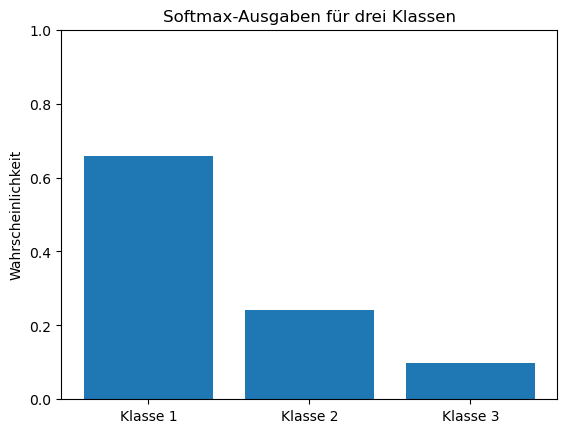

In [8]:
# Visualisierung: Softmax-Ausgaben als Balkendiagramm
import matplotlib.pyplot as plt
labels = ["Klasse 1", "Klasse 2", "Klasse 3"]
plt.bar(labels, softmax)
plt.ylabel("Wahrscheinlichkeit")
plt.title("Softmax-Ausgaben für drei Klassen")
plt.ylim(0, 1)
plt.show()

### Demo: Softmax für Wahrscheinlichkeiten

So hängen Code (Zellen 29/30) und Formel zusammen:
1. Score-Vektor `z = [2.0, 1.0, 0.1]` wird durch `softmax = exp(z) / exp(z).sum()` in Wahrscheinlichkeiten umgerechnet.
2. Der Plot zeigt die drei Wahrscheinlichkeiten als Balken; höchste Balkenhöhe = wahrscheinlichste Klasse.

Softmax stellt sicher, dass alle Werte zwischen 0 und 1 liegen und sich zu 1 summieren – nötig für Klassifikation.
